In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('E_A_NoisySet')
df=df.drop(df.columns[[0]] , 1)

In [3]:
#Levenshtein Distance    
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_LD'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            ld_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                ld = jellyfish.levenshtein_distance(s1 , s2)
                print("LD :" , ld)
                if ld < ld_best:
                    ld_best = ld
                    best_match = s2
                df[col+'_LD'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("ld_best: " , ld_best)        
            print("*******")       

10_Percent
row:  0
s1:  Janubry
s2:  January
LD : 1


s1:  Janubry
s2:  April
LD : 7


s1:  Janubry
s2:  June
LD : 5


s1:  Janubry
s2:  August
LD : 6


s1:  Janubry
s2:  September
LD : 8


s1:  Janubry
s2:  November
LD : 7


Best Match:  January
ld_best:  1
*******
row:  1
s1:  Akgust
s2:  January
LD : 6


s1:  Akgust
s2:  April
LD : 5


s1:  Akgust
s2:  June
LD : 5


s1:  Akgust
s2:  August
LD : 1


s1:  Akgust
s2:  September
LD : 9


s1:  Akgust
s2:  November
LD : 8


Best Match:  August
ld_best:  1
*******
row:  2
s1:  Januare
s2:  January
LD : 1


s1:  Januare
s2:  April
LD : 7


s1:  Januare
s2:  June
LD : 4


s1:  Januare
s2:  August
LD : 6


s1:  Januare
s2:  September
LD : 8


s1:  Januare
s2:  November
LD : 7


Best Match:  January
ld_best:  1
*******
row:  3
s1:  Novqmber
s2:  January
LD : 8


s1:  Novqmber
s2:  April
LD : 8


s1:  Novqmber
s2:  June
LD : 7


s1:  Novqmber
s2:  August
LD : 8


s1:  Novqmber
s2:  September
LD : 5


s1:  Novqmber
s2:  November
LD : 1


Best Ma

In [4]:
#Levenshtein Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
LdAccuracy = []
for x in NameOfColumns:
    if "LD" in x:
        print("LD Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        LdAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(LdAccuracy)

LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  0.983333333333
LD Accuracy :  0.891666666667
LD Accuracy :  0.783333333333
LD Accuracy :  0.6
LD Accuracy :  0.3
[1.0, 1.0, 1.0, 1.0, 1.0, 0.98333333333333328, 0.89166666666666672, 0.78333333333333333, 0.59999999999999998, 0.29999999999999999]


In [16]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [10 , 20 ,30 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_Percent_LD'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_Percent_LD'].iat[x]
diff

,Original,Transformation_10,Transformation_20,Transformation_30,Transformation_40,Transformation_50,Transformation_60,Transformation_70,Transformation_80,Transformation_90,Transformation_100
0,January,,,,,,,,,,
1,August,,,,,,,,,,April
2,January,,,,,,,,,,
3,November,,,,,,,April,,April,January
4,April,,,,,,,,,,June
5,April,,,,,,,,,January,June
6,June,,,,,,,,,April,
7,November,,,,,,,,June,August,January
8,January,,,,,,,,,,June
9,August,,,,,,,,April,,January


In [19]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']

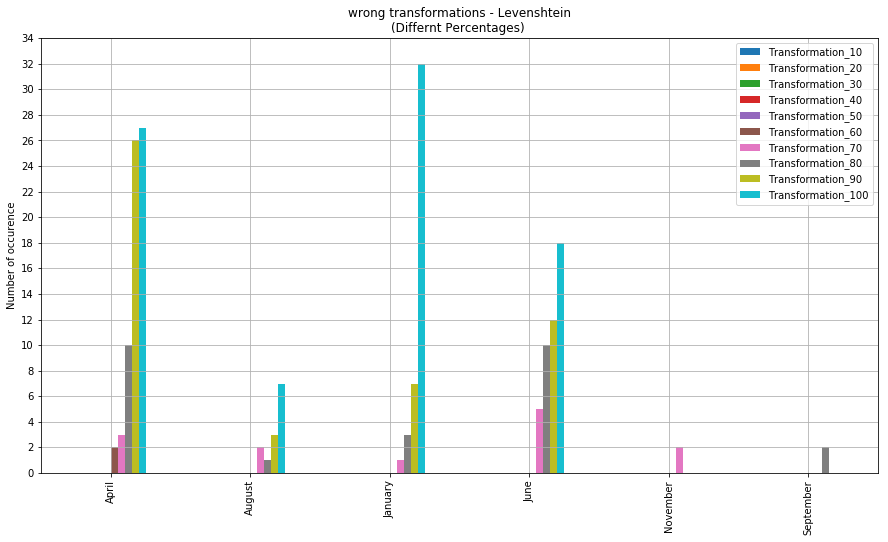

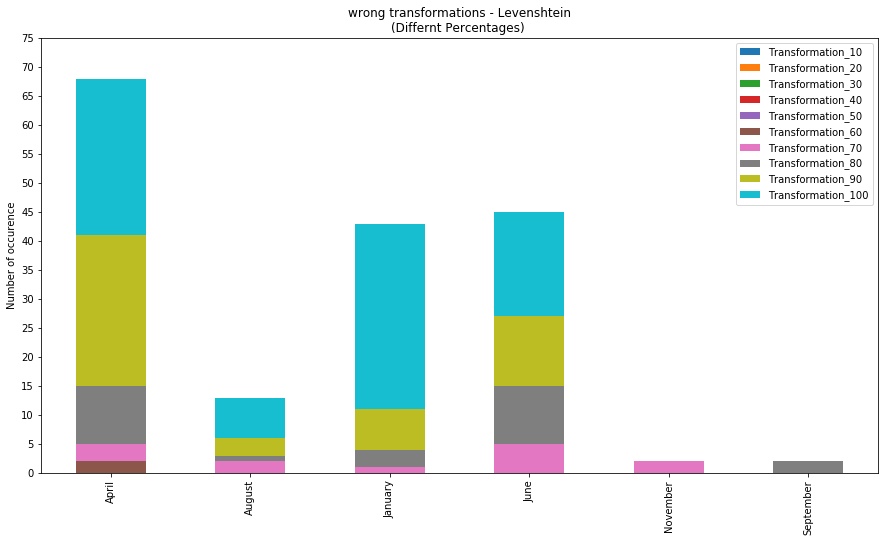

In [7]:
wrong.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.yticks(range(0 , 36 ,2))
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 80 ,5))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.show()

In [8]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,120) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''
#Iterate ove the transformed columns 
per = [10 , 20 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_LD'])
    
    if(len(c[0])>0):
        print(str(p) + '_Percent')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_Percent'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

60_Percent
August To April
Noisy form: Arllsj


August To April
Noisy form: Akcuiu


********
70_Percent
November To April
Noisy form: Norivewc


November To June
Noisy form: Nvnwzxep


January To June
Noisy form: Jufnxrq


November To January
Noisy form: doabeamr


November To June
Noisy form: Nuvttcnb


September To November
Noisy form: waxvqnber


November To August
Noisy form: togbkbtt


November To April
Noisy form: Nbvrxvdl


November To August
Noisy form: Ngggsbwh


August To June
Noisy form: fugelv


September To November
Noisy form: xanvemkgr


August To April
Noisy form: Agpibt


November To June
Noisy form: mmfomnep


********
80_Percent
November To June
Noisy form: gmnesxep


August To April
Noisy form: Anhiri


September To April
Noisy form: Sdreqfble


August To January
Noisy form: dngfre


November To September
Noisy form: meeymldr


November To April
Noisy form: ybbeerel


November To August
Noisy form: Nuhhcbtu


November To September
Noisy form: iplambvn


September T

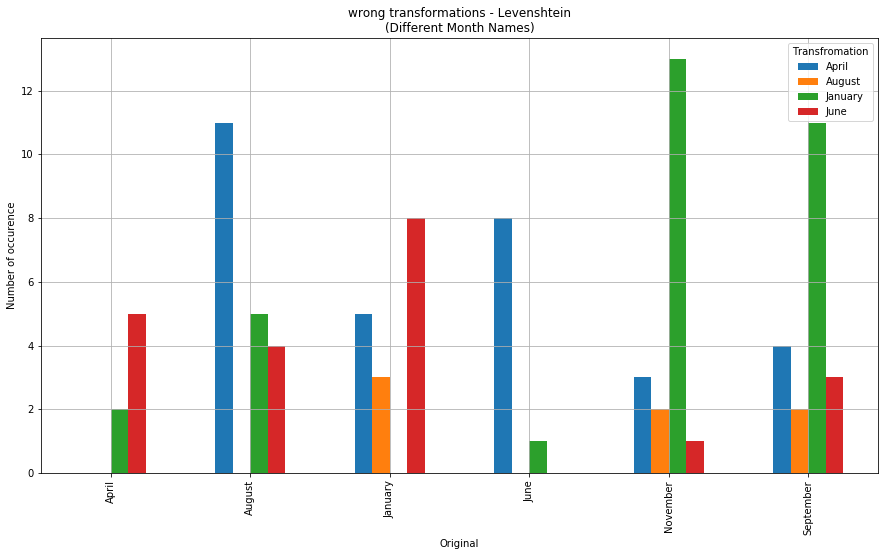

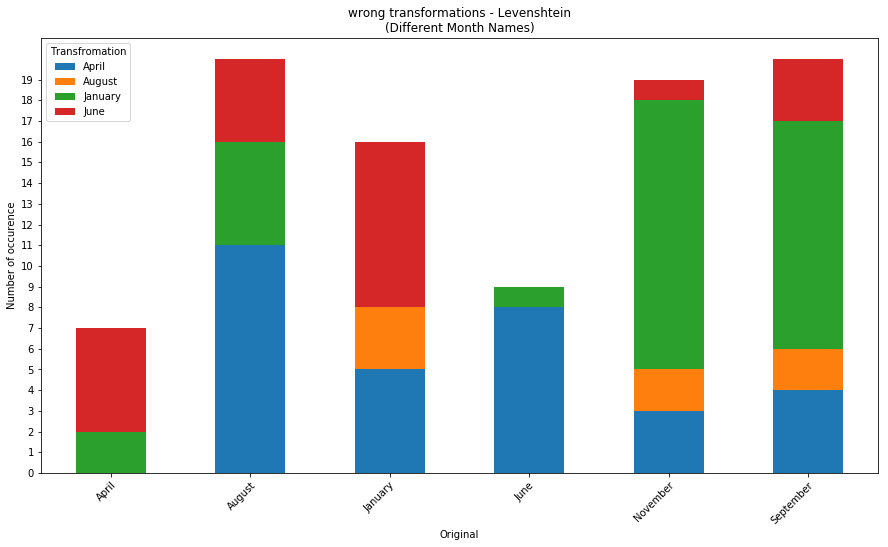

In [9]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.show()

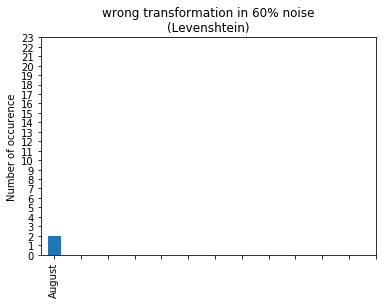

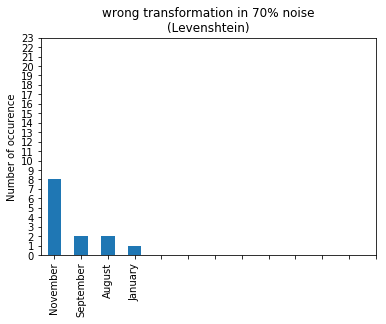

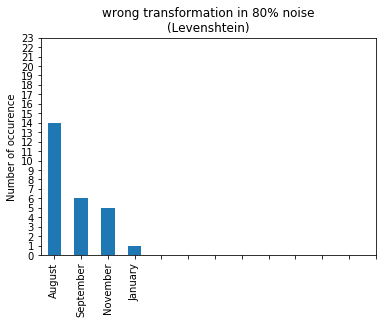

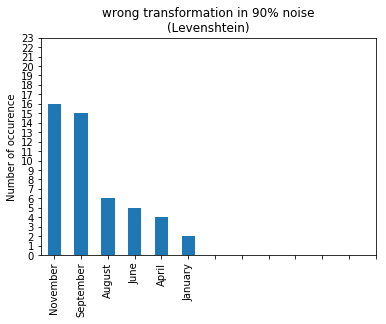

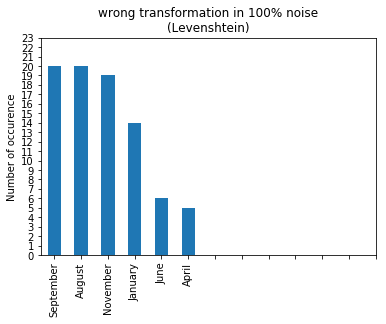

In [10]:
import numpy as np

#Iterate ove the transformed columns 
per = [60 , 70 , 80 , 90 , 100]

for p in per:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_LD'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_Percent'] = ''
    for x in np.nditer(c):
        x = int(x)
        diff['Original'].iat[x] = df['STD_Months'].iat[x]
        diff[str(p) + '_Percent'].iat[x] = df[str(p) + '_Percent'].iat[x]
        diff['Transformation'].iat[x] = df[str(p) + '_Percent_LD'].iat[x]
    diff.dropna()
    wrongTransform = diff['Original'].value_counts()
    wrongTransform.plot.bar()
    plt.yticks(range(0 , 24))
    plt.ylabel('Number of occurence')
    plt.title('wrong transformation in {}% noise\n(Levenshtein)'.format(p))
    plt.xticks(range(0,13))
    plt.show()

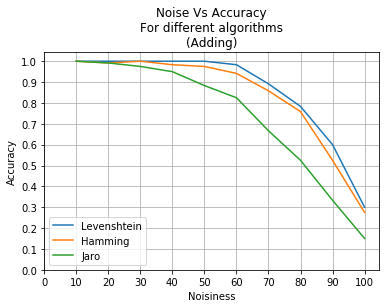

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x = [10,20,30,40,50,60,70,80,90,100]
yLD=LdAccuracy
yHamming=[1.0, 0.9916666666666667, 1.0, 0.98333333333333328, 0.97499999999999998, 0.94166666666666665, 0.85833333333333328, 0.7583333333333333, 0.52500000000000002, 0.27500000000000002]
yJaro=[1.0, 0.9916666666666667, 0.97499999999999998, 0.94999999999999996, 0.8833333333333333, 0.82499999999999996, 0.66666666666666663, 0.52500000000000002, 0.33333333333333331, 0.14999999999999999]
plt.plot(x,yLD , label = 'Levenshtein')
plt.plot(x,yHamming , label = 'Hamming')
plt.plot(x,yJaro , label = 'Jaro')
#Add title and label
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.title('Noise Vs Accuracy\nFor different algorithms\n(Adding)')
plt.xticks(np.arange(0 , 110 , 10))
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.legend()
plt.grid()
plt.show()